In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
from plotnine import *
import scipy.stats as st
from sklearn.datasets.samples_generator import make_blobs
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from matplotlib import cm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


N = 5000
x1 = np.random.normal(1.5, 1, N)
y1 = np.random.normal(1.6, 1, N)
x2 = np.random.normal(2.5, 1, N)
y2 = np.random.normal(2.2, 1, N)

df = pd.DataFrame({'x': np.append(x1, x2), 'y': np.append(y1, y2)})
df


C:\QMDownload\anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.


,x,y
0,0.413712,0.143755
1,1.205950,0.895602
2,1.923468,3.724413
3,0.322189,2.100461
4,0.579565,0.727344
...,...,...
9995,2.640112,2.224756
9996,1.739454,2.237046
9997,2.576355,4.200698
9998,4.097713,2.172815


-2.6808710865136582 6.698153740234547 -2.5459613205158007 6.469531323852005


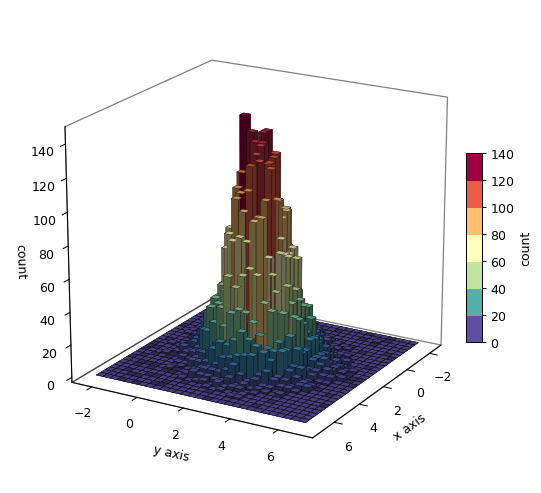

In [2]:
# Extract x and y
x = df.x.values
y = df.y.values
# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY
print(xmin, xmax, ymin, ymax)
# Create meshgrid
#X, Y = np.mgrid[xmin:xmax:30j, ymin:ymax:30j]

X = np.linspace(xmin, xmax, 30)
Y = np.linspace(ymin, ymax, 30)

hist, xedges, yedges = np.histogram2d(x, y, (X, Y))

XX, YY = np.meshgrid(X[1:], Y[1:])

fig = plt.figure(figsize=(7, 7), dpi=90)
#ax = fig.add_subplot(111, projection='3d')
ax = fig.gca(projection='3d')
ax.view_init(azim=30, elev=20)  # 改变绘制图像的视角,即相机的位置,azim沿着z轴旋转，elev沿着y轴
ax.grid(False)

ax.xaxis._axinfo['tick']['outward_factor'] = 0
ax.xaxis._axinfo['tick']['inward_factor'] = 0.4
ax.yaxis._axinfo['tick']['outward_factor'] = 0
ax.yaxis._axinfo['tick']['inward_factor'] = 0.4
ax.zaxis._axinfo['tick']['outward_factor'] = 0
ax.zaxis._axinfo['tick']['inward_factor'] = 0.4
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('k')
ax.yaxis.pane.set_edgecolor('k')
ax.zaxis.pane.set_edgecolor('k')

dz = hist.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

colors = cm.Spectral_r(dz / float(max(dz)))

ax.bar3d(XX.ravel(), YY.ravel(), zpos, 0.3, 0.3, dz, zsort='average', color=colors,
         alpha=1, edgecolor='k', linewidth=0.2)

ax.set_xlabel("x axis")
ax.set_ylabel("y axis")
ax.set_zlabel("count")

ax2 = fig.add_axes([0.85, 0.35, 0.025, 0.3])
cmap = mpl.cm.Spectral_r
norm = mpl.colors.Normalize(vmin=0, vmax=1)
bounds = np.arange(min(dz), max(dz), 20)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb2 = mpl.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm, boundaries=bounds,
                                ticks=np.arange(min(dz), max(dz), 20), spacing='proportional', label='count')
cb2.set_label('count')
# fig.savefig('三维统计直方图.pdf')
plt.show()
